In [4]:
import numpy as np
import uproot 
import awkward as ak
import h5py
import ROOT as root 

In [5]:
file = uproot.open("/Users/jorgehernandez/Documents/HEP_work/BoostedJetML/l1TNtuple-ggHBB_29Jul.root") 
tree = file['l1NtupleProducer/efficiencyTree']


jetreg = tree['jetRegionEt'].array()
#print(jetreg) #.to_numpy().shape) 

allflat = ak.flatten(jetreg, axis=None) #was able to see that the jetreg awk array was a nested 
#list with inconsistent lengths and cant easily be converted into a numpy array
#print(allflat)
#print(ak.num(allflat, axis=0))
#print(1392012/9)

jr = allflat.to_numpy()

#print(jr.shape)

jetreg_r = np.resize(jr, (154668, 3,3))
print(jetreg_r.shape)

#print(jetreg_r[1])
#print(jr.shape)

(154668, 3, 3)


In [32]:
signals = tree['allL1Signals'].array()

print(signals[3]) # in all the events we may not have the same amount of jets. It is 1 to 1 correspondence with 3x3 jet regions 
allflat = ak.flatten(signals, axis=None) #was able to see that the jetreg awk array was a nested 
#list with inconsistent lengths and cant easily be converted into a numpy array
#print(allflat)
#print(ak.num(allflat, axis=0))

#Make and write to the file an array that contains the size of the jets in each event. 
jets_per_event = ak.count(signals, axis =1)

signals_r = allflat.to_numpy()
#print(signals_r.shape)


[False, False, False, True, False, False, False, False, False]
18215


In [46]:
#Read the reco_pt
reco_pt = tree['recoPt_1'].array().to_numpy()
#print(reco_pt.shape)


#Read the l1_pt
l1_pt = tree["l1Pt_1"].array().to_numpy()
#print(l1_pt.shape) 

#Read the l1_jets
l1_jets = tree["allL1Jets"].array()
#print(l1_jets)

flat_jets = ak.flatten(l1_jets, axis=1)
l1jets = flat_jets.to_numpy()


#Read the reco_eta. 
reco_eta = tree["recoEta_1"].array().to_numpy()
#print(reco_eta.shape)

#Read the reco_phi 
reco_phi =tree["recoPhi_1"].array().to_numpy()
#print(reco_phi.shape)

l1_jets_2 = tree["l1Jets"].array()



In [80]:
print(len(l1_jets_2[3]))

2


In [81]:
#couldnt use the ak.count method because it doesn't recognize how the Lorentz Vectors read
#print(len(l1_jets_2))

bit_pattern_multiplicity  = [] 
for index in range(0, len(l1_jets_2)):

    bit_pattern_multiplicity.append(len(l1_jets_2[index])) 

print(len(bit_pattern_multiplicity))

#check_array = np.array(bit_pattern_multiplicity)

18215


Warning in <TROOT::Append>: Replacing existing TH1: Njet (Potential memory leak).


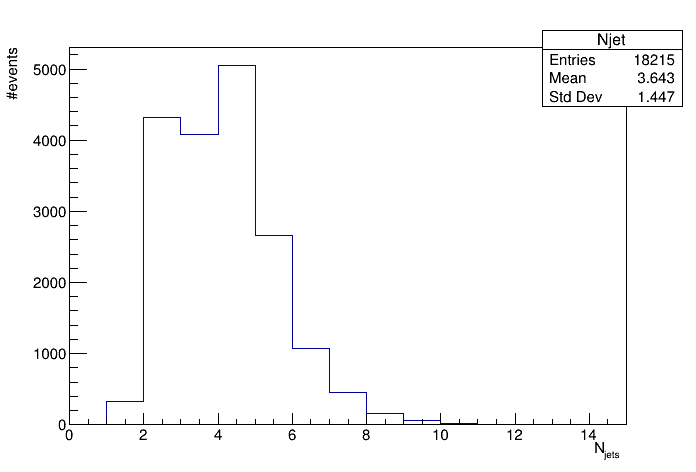

In [66]:
bit_patt_hist = root.TH1F("Njet" , " ; N_{jets} ; #events" , 15 , 0 ,15 ) 

for ele in bit_pattern_multiplicity: 

    bit_patt_hist.Fill(ele) 

canvas = root.TCanvas()

bit_patt_hist.Draw()
canvas.Draw()


In [58]:
l1Eta_1 = tree["l1Eta_1"].array().to_numpy()
#print(l1Eta_1.shape)

l1Phi_1 = tree["l1Phi_1"].array().to_numpy()
#print(l1Phi_1.shape)


In [33]:
with h5py.File('dataRead', 'w') as f: 
    dset1 = f.create_dataset("jetreg" , data = jetreg_r) 
    dset2 = f.create_dataset("signals", data = signals_r)
    dset3 = f.create_dataset("recoPt_1", data = reco_pt )  
    dset4 = f.create_dataset("l1_pt", data = l1_pt)  
    dset5 = f.create_dataset("l1_jets", data = l1jets) 
    dset6 = f.create_dataset("reco_eta", data = reco_eta)
    dset7 = f.create_dataset("reco_phi", data = reco_phi)
    dset8 = f.create_dataset("jets_per_event", data = jets_per_event)
    dset9 = f.create_dataset("l1Eta_1", data = l1Eta_1 )
    dset10 =  f.create_dataset("l1Phi_1", data = l1Phi_1)